<a href="https://colab.research.google.com/github/lhlich/ml_coding/blob/master/classic_ml/linear_regression_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient descent over linear regression**

Firstly generate dataset

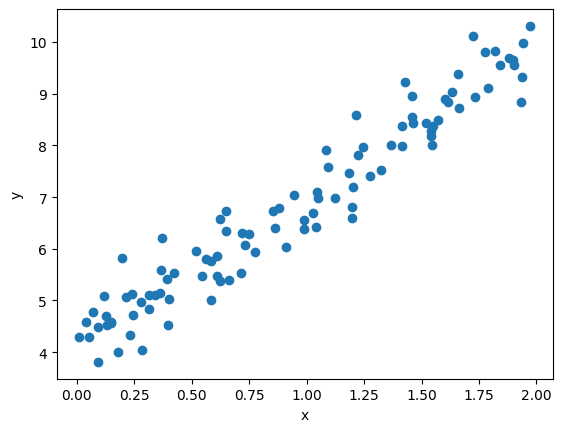

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)

# we'll never know the ground truth of nosie_sigma, b1 or b0
noise_sigma = 0.5
w = 3
b = 4

y = b + w * X + noise_sigma * np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Check MSE loss from ideal case

In [12]:
def MSE(y_pred, y_truth) -> float:
    return np.mean((y_pred - y_truth) ** 2)

y_pred_ideal = b + w * X
print(f'MSE loss from an oracle: {MSE(y_pred_ideal, y)}')

MSE loss from an oracle: 0.2062766949769846


**Linear regression through gradient descent**

The math:

$
L = \frac{1}{n}\sum_{i=1}^n(y_i-wx_{i} - b)^2
$

$
\frac{\partial L}{\partial w} = -\frac{2}{n}\sum_{i=1}^n x_{i}(y_i-wx_{i} - b)
= -\frac{2}{n}\sum_{i=1}^n x_{i}(y_i-y_{i}^{(pred)})
$

$
\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i-wx_{i} - b)
= -\frac{2}{n}\sum_{i=1}^n (y_i-y_{i}^{(pred)})
$

At epoch 20, loss 651.4444469005807
At epoch 40, loss 8094.468845221889
At epoch 60, loss 100603.48133937031
At epoch 80, loss 1250393.7994982621
At epoch 100, loss 15541085.48551681
MSE: 17628001.49969977
w from training [-2187.28713301], ground truth 3
b from training [-1929.69544898], ground truth 4


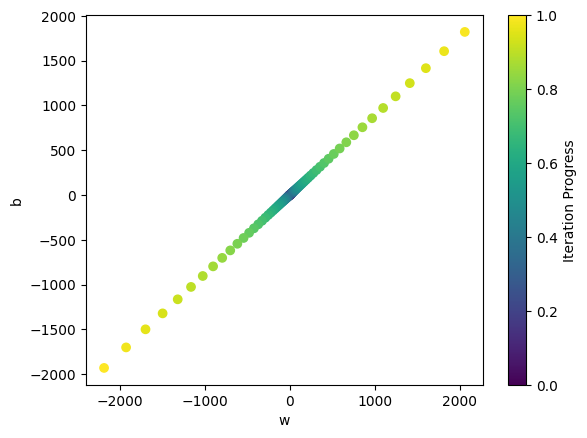

In [16]:
from typing import List

max_epochs = 100
learning_rate = 0.5

params = np.random.randn(2, 1) # [w, b]
loss = []
params_history = [params.copy()]
for i in range(1, max_epochs+1):
    w_gd, b_gd = params
    pred = X * w_gd + b_gd
    loss.append(MSE(y, pred))

    dLdw = (-2/m) * np.sum(X*(y-pred))
    dLdb = (-2/m) * np.sum(y-pred)
    gradient = np.array([dLdw, dLdb]).reshape(2, 1)

    params -= learning_rate*gradient
    params_history.append(params.copy())

    if i%20 == 0:
        print(f'At epoch {i}, loss {loss[-1]}')

print(f"MSE: {MSE(y, X * w_gd + b_gd)}")
print(f'w from training {w_gd}, ground truth {w}')
print(f'b from training {b_gd}, ground truth {b}')



# Visualize the evolution of b_gd over time
params_history = np.hstack(params_history)  # Stack history horizontally for plotting

# Create a colormap based on iteration index
num_points = len(params_history[0, :])  # Number of points in history
iterations = np.linspace(0, 1, num_points)  # Create a normalized array for the colormap
colors = plt.cm.viridis(iterations)  # Use a colormap (viridis)

plt.scatter(params_history[0, :], params_history[1, :], c=iterations, cmap='viridis')
plt.colorbar(label='Iteration Progress')  # Add colorbar to show iteration progress
plt.xlabel('w')
plt.ylabel('b')
plt.show()

Linear regression from closed form solution(i.e. the normal Equation)

$
\hat{\theta} = (X^TX)^{-1} X^Ty
$

Note: This equation is for linear regression without bias parameter. To apply this equation, we just need to define an extra feature with fixed value '1' and the bias parameter will be the weight of this forged feature

Originia model: $y_{pred} = x * w + b$

equivalent model: $y_{pred} = [x, 1] * [w, b]^T$

In [17]:
def linear_reg_closed_form(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

X_with_forged_feature = np.hstack([X, np.ones_like(X)])
params = linear_reg_closed_form(X_with_forged_feature, y)

w_hat, b_hat = params
y_pred_closed_form = b_hat + w_hat * X
print(f'MSE loss from linear regression of closed form: {MSE(y_pred_closed_form, y)}')
print(f'w from training {w_hat}, ground truth {w}')
print(f'b from training {b_hat}, ground truth {b}')

MSE loss from linear regression of closed form: 0.20164614099176345
w from training [2.88505669], ground truth 3
b from training [4.10754808], ground truth 4


Validation from sklearn approach

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression(fit_intercept=True).fit(X, y)
print(f"Mse: {MSE(y, reg.predict(X))}")
print(f'w from training {reg.coef_}, ground truth {w}')
print(f'b from training {reg.intercept_}, ground truth {b}')

Mse: 0.20164614099176337
w from training [[2.88505669]], ground truth 3
b from training [4.10754808], ground truth 4


**Ridge Regression**

The math:

$
L = \frac{1}{n}\sum_{i=1}^n(y_i-wx_{i} - b)^2 + \lambda w^2
$

$
\frac{\partial L}{\partial w} = -\frac{2}{n}\sum_{i=1}^n x_{i}(y_i-y_{i}^{(pred)}) + 2\lambda w
$

$
\frac{\partial L}{\partial b} = -\frac{2}{n}\sum_{i=1}^n (y_i-y_{i}^{(pred)})
$

At epoch 20, loss 0.20864573352621743
At epoch 40, loss 0.20403911573132227
At epoch 60, loss 0.20820741216499414
At epoch 80, loss 0.21251035140571584
At epoch 100, loss 0.21549769817508463
MSE: 0.2062766949769846
w from training [2.68566999], ground truth 3
b from training [4.28913411], ground truth 4


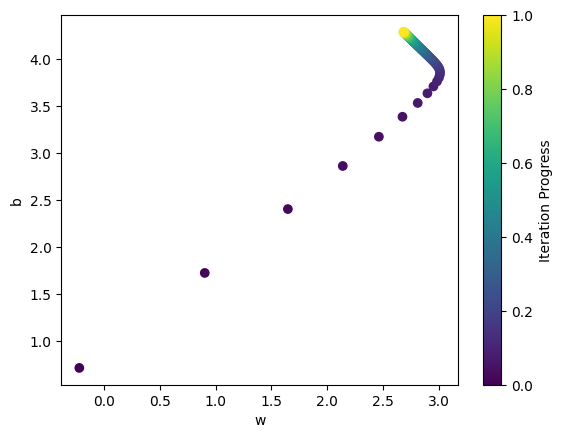

In [11]:
from typing import List


max_epochs = 100
learning_rate = 0.08
Lambda = 0.03

params = np.random.randn(2, 1) # [w, b]
loss = []
params_history = [params.copy()]
for i in range(1, max_epochs+1):
    w_gd, b_gd = params
    pred = X * w_gd + b_gd
    loss.append(MSE(y, pred))

    dLdw = (-2/m) * np.sum(X*(y-pred)) + 2 * Lambda * w_gd
    dLdw = dLdw[0]
    dLdb = (-2/m) * np.sum(y-pred)
    gradient = np.array([dLdw, dLdb]).reshape(2, 1)

    params -= learning_rate*gradient
    params_history.append(params.copy())

    if i%20 == 0:
        print(f'At epoch {i}, loss {loss[-1]}')

print(f"MSE: {MSE(y, X * w + b)}")
print(f'w from training {w_gd}, ground truth {w}')
print(f'b from training {b_gd}, ground truth {b}')



# Visualize the evolution of b_gd over time
params_history = np.hstack(params_history)  # Stack history horizontally for plotting

# Create a colormap based on iteration index
num_points = len(params_history[0, :])  # Number of points in history
iterations = np.linspace(0, 1, num_points)  # Create a normalized array for the colormap
colors = plt.cm.viridis(iterations)  # Use a colormap (viridis)

plt.scatter(params_history[0, :], params_history[1, :], c=iterations, cmap='viridis')
plt.colorbar(label='Iteration Progress')  # Add colorbar to show iteration progress
plt.xlabel('w')
plt.ylabel('b')
plt.show()

**Let's do it in pytorch with back propagation**

At epoch 20, loss 0.20178197292271427
At epoch 40, loss 0.20168456900208676
At epoch 60, loss 0.20165891804633929
At epoch 80, loss 0.20165038908278482
At epoch 100, loss 0.20164755364417528
MSE: 0.20164755364417528
w from training tensor([2.8832], grad_fn=<AsStridedBackward0>), ground truth 3
b from training tensor([4.1097], grad_fn=<AsStridedBackward0>), ground truth 4


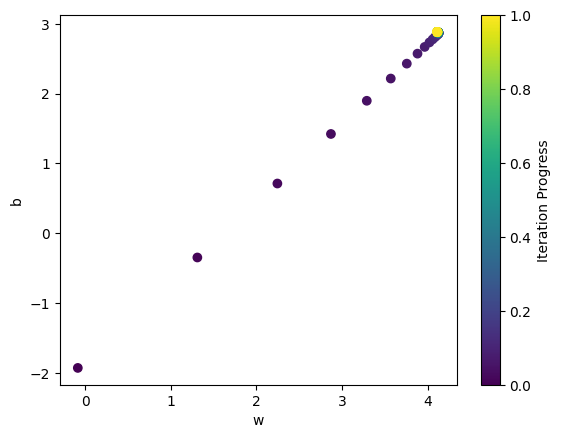

In [5]:
from typing import List
import torch


max_epochs = 100
learning_rate = 0.08

params = torch.randn(2, 1, requires_grad=True) # [w, b]
loss = []
X_tensor = torch.tensor(X)
y_tensor = torch.tensor(y)

params_history = [params.clone().detach()]

for i in range(1, max_epochs+1):


    w_gd, b_gd = params[1], params[0]
    pred = X_tensor * w_gd + b_gd
    loss_tensor = torch.mean((pred - y_tensor) ** 2)
    loss_tensor.backward()

    with torch.no_grad():
        params -= learning_rate * params.grad

    params.grad.zero_()

    loss.append(loss_tensor.item())
    params_history.append(params.clone().detach())
    if i%20 == 0:
        print(f'At epoch {i}, loss {loss[-1]}')

print(f"MSE: {loss[-1]}")
print(f'w from training {w_gd}, ground truth {w}')
print(f'b from training {b_gd}, ground truth {b}')



# Visualize the evolution of b_gd over time
params_history = np.hstack(params_history)  # Stack history horizontally for plotting

# Create a colormap based on iteration index
num_points = len(params_history[0, :])  # Number of points in history
iterations = np.linspace(0, 1, num_points)  # Create a normalized array for the colormap
colors = plt.cm.viridis(iterations)  # Use a colormap (viridis)

plt.scatter(params_history[0, :], params_history[1, :], c=iterations, cmap='viridis')
plt.colorbar(label='Iteration Progress')  # Add colorbar to show iteration progress
plt.xlabel('w')
plt.ylabel('b')
plt.show()